In [ ]:
!pip install pandas matplotlib seaborn scipy statsmodels

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
from google.colab import files

# Upload dataset
uploaded = files.upload()

# Load the dataset into a Pandas DataFrame
file_path = list(uploaded.keys())[0]
df = pd.read_excel(file_path)  # Use pd.read_csv(file_path) if your file is a CSV

# Assuming the offsets are in micrometers (µm)
df['c_offset'] = (df['x_offset'] ** 2 + df['y_offset'] ** 2) ** 0.5  # Calculating center offset

Saving 1025 combined thin cpu inside thin.xlsx to 1025 combined thin cpu inside thin.xlsx


<ipython-input-4-c53b0eb1a830>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['x_offset'], y=df['y_offset'], cmap="Blues", shade=True, bw_adjust=0.5)


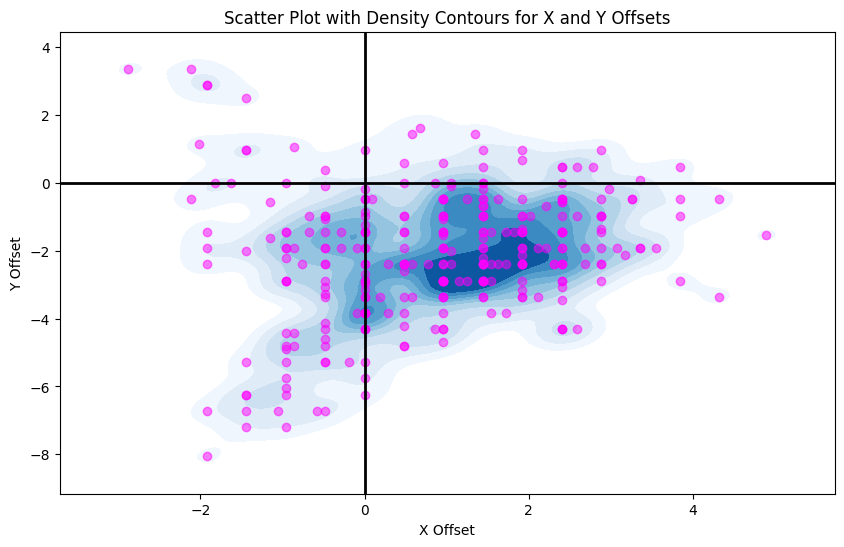

In [ ]:
# Scatter plot with density contours
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['x_offset'], y=df['y_offset'], cmap="Blues", shade=True, bw_adjust=0.5)
plt.scatter(df['x_offset'], df['y_offset'], alpha=0.5, color='magenta')
plt.title('Scatter Plot with Density Contours for X and Y Offsets')
plt.xlabel('X Offset')
plt.ylabel('Y Offset')
plt.axhline(0, color='black', lw=2)
plt.axvline(0, color='black', lw=2)
plt.show()


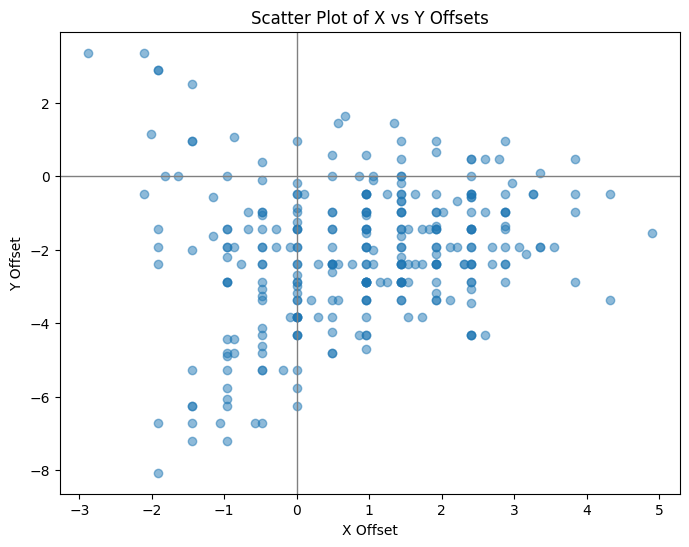

In [ ]:
# Scatter plot of X vs. Y Offsets
plt.figure(figsize=(8, 6))
plt.scatter(df['x_offset'], df['y_offset'], alpha=0.5)
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.title('Scatter Plot of X vs Y Offsets')
plt.xlabel('X Offset')
plt.ylabel('Y Offset')
plt.show()

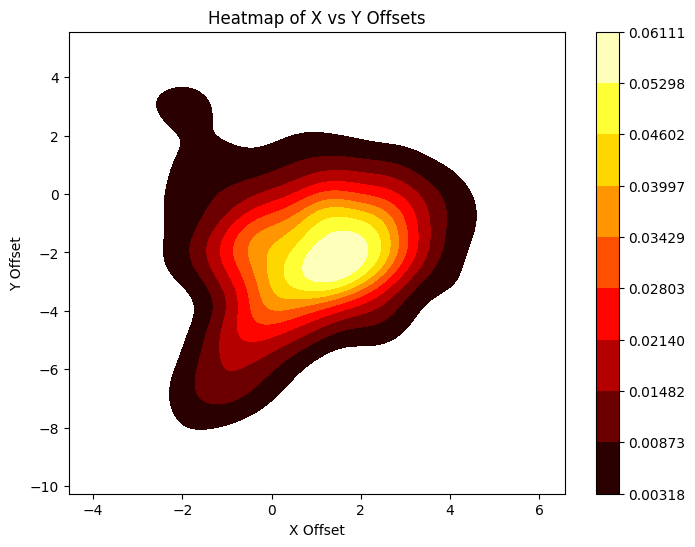

In [ ]:
# Create a KDE plot with a frequency color bar
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(x=df['x_offset'], y=df['y_offset'], cmap="hot", fill=True, cbar=True)
ax.set_title('Heatmap of X vs Y Offsets')
ax.set_xlabel('X Offset')
ax.set_ylabel('Y Offset')
plt.show()

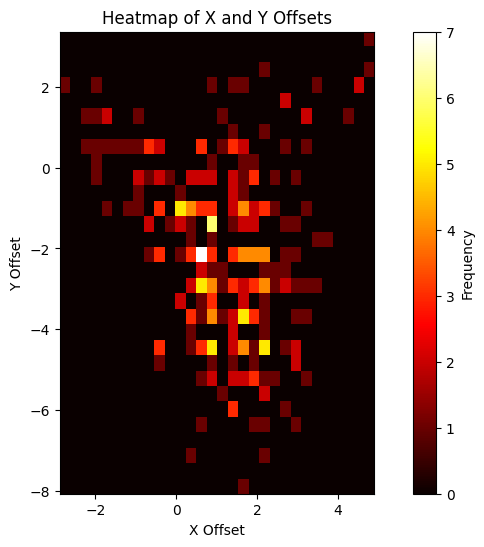

In [ ]:
# Heatmap of X and Y offsets
plt.figure(figsize=(10, 6))
heatmap_data = np.histogram2d(df['x_offset'], df['y_offset'], bins=30)
plt.imshow(heatmap_data[0], extent=(df['x_offset'].min(), df['x_offset'].max(), df['y_offset'].min(), df['y_offset'].max()), cmap='hot', interpolation='nearest')
plt.title('Heatmap of X and Y Offsets')
plt.xlabel('X Offset')
plt.ylabel('Y Offset')
plt.colorbar(label='Frequency')
plt.show()


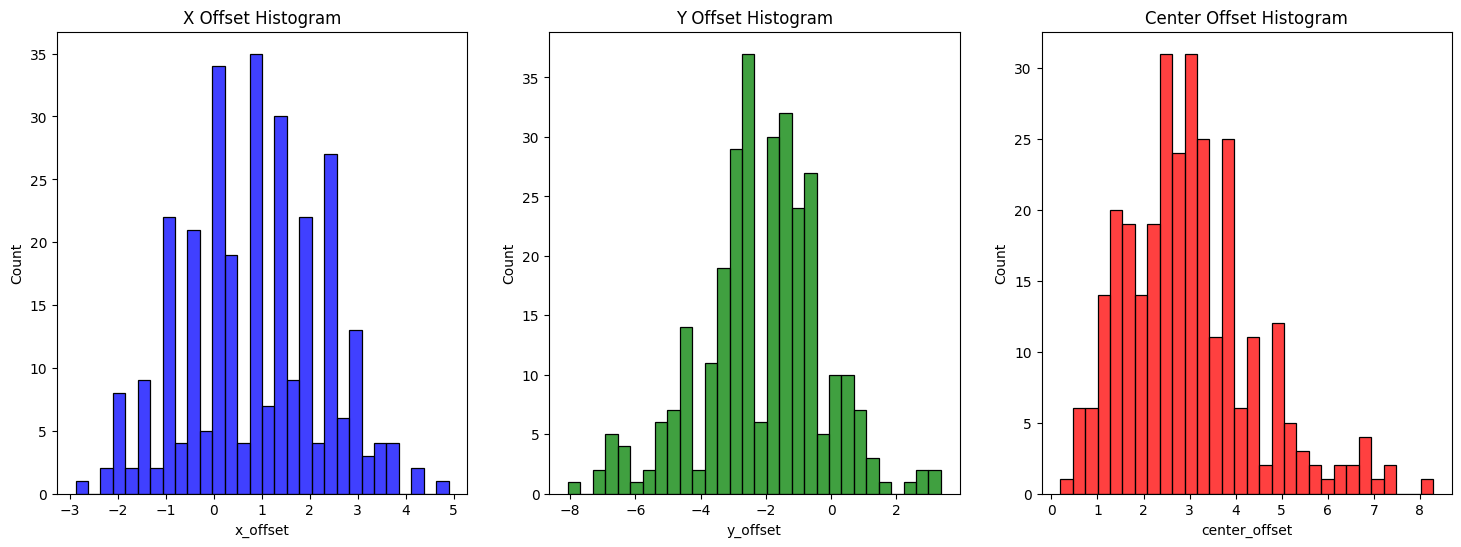

In [ ]:
# Calculate the center offset as sqrt(x_offset^2 + y_offset^2)
df['center_offset'] = np.sqrt(df['x_offset']**2 + df['y_offset']**2)

# Histograms of X, Y, and Center offsets
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df['x_offset'], bins=30, ax=axs[0], color='blue')
axs[0].set_title('X Offset Histogram')

sns.histplot(df['y_offset'], bins=30, ax=axs[1], color='green')
axs[1].set_title('Y Offset Histogram')

sns.histplot(df['center_offset'], bins=30, ax=axs[2], color='red')
axs[2].set_title('Center Offset Histogram')

plt.show()


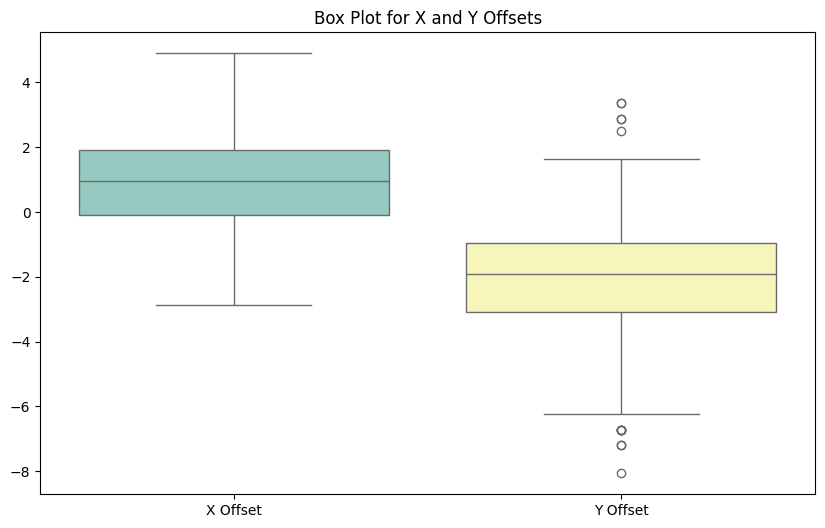

In [ ]:
# Box plots for X and Y offsets
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df['x_offset'], df['y_offset']], palette='Set3')
plt.xticks([0, 1], ['X Offset', 'Y Offset'])
plt.title('Box Plot for X and Y Offsets')
plt.show()


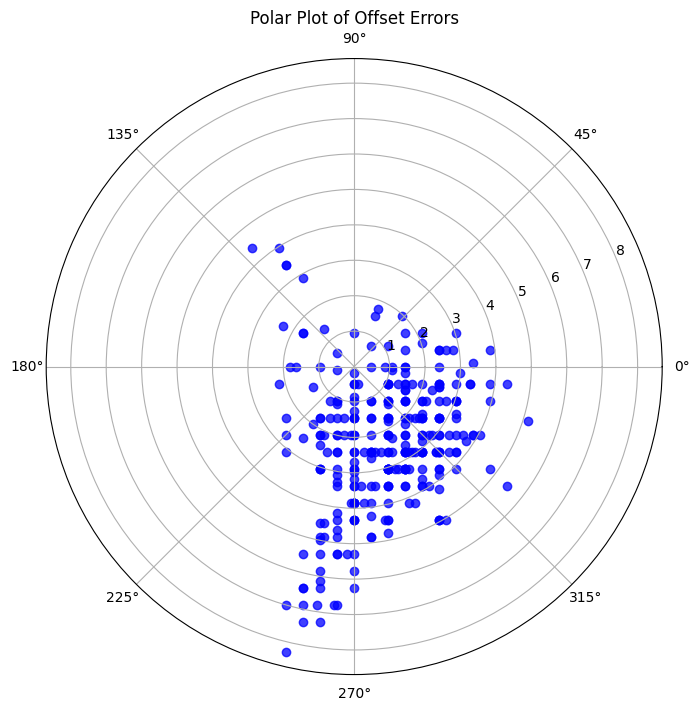

In [ ]:
# Convert to polar coordinates (angle and radius)
df['angle'] = np.arctan2(df['y_offset'], df['x_offset'])
df['radius'] = np.sqrt(df['x_offset']**2 + df['y_offset']**2)

# Polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.scatter(df['angle'], df['radius'], c='blue', alpha=0.75)
plt.title('Polar Plot of Offset Errors')
plt.show()


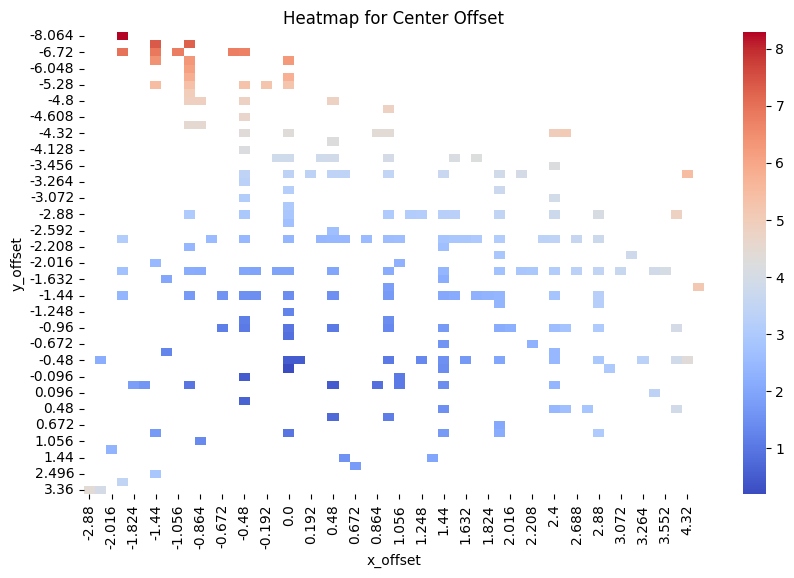

In [ ]:
# Heatmap for Center Offset
plt.figure(figsize=(10, 6))
sns.heatmap(df.pivot_table(index='y_offset', columns='x_offset', values='center_offset'), cmap='coolwarm', cbar=True)
plt.title('Heatmap for Center Offset')
plt.show()


In [ ]:
# MAE for X and Y offsets
mae_x = np.mean(np.abs(df['x_offset']))
mae_y = np.mean(np.abs(df['y_offset']))

print(f"MAE for X Offset: {mae_x}")
print(f"MAE for Y Offset: {mae_y}")


MAE for X Offset: 1.35808
MAE for Y Offset: 2.3270399999999998


In [ ]:
# RMSE for center offset
rmse_center = np.sqrt(np.mean(df['center_offset']**2))
print(f"RMSE for Center Offset: {rmse_center}")


RMSE for Center Offset: 3.2894630321680163


In [ ]:
# Standard deviation for X, Y, and Center Offsets
std_x = np.std(df['x_offset'])
std_y = np.std(df['y_offset'])
std_center = np.std(df['center_offset'])

print(f"Standard Deviation for X Offset: {std_x}")
print(f"Standard Deviation for Y Offset: {std_y}")
print(f"Standard Deviation for Center Offset: {std_center}")


Standard Deviation for X Offset: 1.4366005741332566
Standard Deviation for Y Offset: 1.8921645188513583
Standard Deviation for Center Offset: 1.4070994812055306
